In [1]:
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)
# 레이블을 벡터로 변환합니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\as_th\anaconda3\envs\ai1\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\as_th\anaconda3\envs\ai1\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprec

In [2]:
from tensorflow.keras import models
from tensorflow.keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])
                      

In [3]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 60ms/step - loss: 0.5511 - acc: 0.7581 - val_loss: 0.3444 - val_acc: 0.8799
Epoch 2/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2776 - acc: 0.9074 - val_loss: 0.2908 - val_acc: 0.8849
Epoch 3/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2004 - acc: 0.9325 - val_loss: 0.2921 - val_acc: 0.8836
Epoch 4/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1695 - acc: 0.9425 - val_loss: 0.3012 - val_acc: 0.8804
Epoch 5/20
49/49 [==============================] - 1s 20ms/step - loss: 0.1439 - acc: 0.9505 - val_loss: 0.3082 - val_acc: 0.8814
Epoch 6/20
49/49 [==============================] - 1s 20ms/step - loss: 0.1208 - acc: 0.9597 - val_loss: 0.3397 - val_acc: 0.8752
Epoch 7/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1061 - acc: 0.9651 - val_loss: 0.3619 - val_acc: 0.8721
Epoch 8/20
49/49 [==============================] - 1s 28ms/step - loss: 0.0907 - a

In [4]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 40ms/step - loss: 0.6319 - acc: 0.6799 - val_loss: 0.5186 - val_acc: 0.8672
Epoch 2/20
49/49 [==============================] - 1s 26ms/step - loss: 0.4647 - acc: 0.8793 - val_loss: 0.4082 - val_acc: 0.8622
Epoch 3/20
49/49 [==============================] - 1s 25ms/step - loss: 0.3387 - acc: 0.9116 - val_loss: 0.3294 - val_acc: 0.8878
Epoch 4/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2595 - acc: 0.9282 - val_loss: 0.2986 - val_acc: 0.8867
Epoch 5/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2085 - acc: 0.9387 - val_loss: 0.2893 - val_acc: 0.8855
Epoch 6/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1754 - acc: 0.9478 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 7/20
49/49 [==============================] - 1s 20ms/step - loss: 0.1575 - acc: 0.9520 - val_loss: 0.2913 - val_acc: 0.8833
Epoch 8/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1403 - a

In [5]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

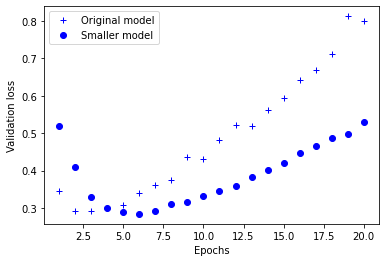

In [6]:
import matplotlib.pyplot as plt
# ‘b+’는 파란색 덧셈 기호을 의미합니다
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [7]:
# 큰용량의 모델
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(1024, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 12s 225ms/step - loss: 0.7900 - acc: 0.6821 - val_loss: 0.3108 - val_acc: 0.8674
Epoch 2/20
49/49 [==============================] - 12s 244ms/step - loss: 0.2324 - acc: 0.9088 - val_loss: 0.4007 - val_acc: 0.8325
Epoch 3/20
49/49 [==============================] - 11s 225ms/step - loss: 0.1102 - acc: 0.9592 - val_loss: 0.2945 - val_acc: 0.8844
Epoch 4/20
49/49 [==============================] - 13s 267ms/step - loss: 0.0477 - acc: 0.9902 - val_loss: 0.4271 - val_acc: 0.8839
Epoch 5/20
49/49 [==============================] - 13s 271ms/step - loss: 0.0028 - acc: 0.9996 - val_loss: 0.6260 - val_acc: 0.8805
Epoch 6/20
49/49 [==============================] - 10s 215ms/step - loss: 1.4589e-04 - acc: 1.0000 - val_loss: 0.8536 - val_acc: 0.8803
Epoch 7/20
49/49 [==============================] - 12s 239ms/step - loss: 5.0256e-06 - acc: 1.0000 - val_loss: 1.0019 - val_acc: 0.8801
Epoch 8/20
49/49 [==============================] - 10s 214ms

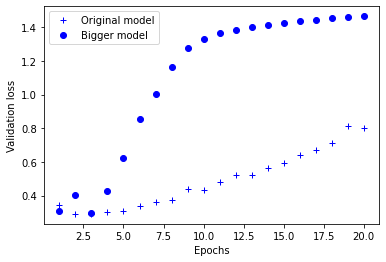

In [8]:

bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

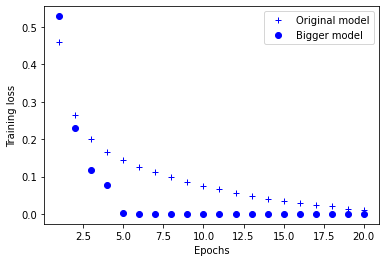

In [9]:

original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

Epoch 1/20
49/49 [==============================] - 2s 37ms/step - loss: 0.6007 - acc: 0.7377 - val_loss: 0.3861 - val_acc: 0.8812
Epoch 2/20
49/49 [==============================] - 1s 20ms/step - loss: 0.3292 - acc: 0.9047 - val_loss: 0.3361 - val_acc: 0.8888
Epoch 3/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2718 - acc: 0.9218 - val_loss: 0.3287 - val_acc: 0.8894
Epoch 4/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2427 - acc: 0.9326 - val_loss: 0.3380 - val_acc: 0.8860
Epoch 5/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2277 - acc: 0.9375 - val_loss: 0.3388 - val_acc: 0.8847
Epoch 6/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2229 - acc: 0.9375 - val_loss: 0.3489 - val_acc: 0.8820
Epoch 7/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2112 - acc: 0.9453 - val_loss: 0.3699 - val_acc: 0.8758
Epoch 8/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2124 - a

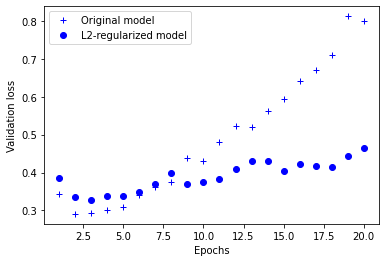

In [10]:
# 모델에 L2 가중치 추가
from tensorflow.keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))


l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [ ]:
# 드롭아웃

